<a href="https://colab.research.google.com/github/Jwainlee/python-baby/blob/main/%EA%B5%90%EC%9C%A1_%EB%94%A5%EB%9F%AC%EB%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 분류 예측

## Data 읽기

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
print(tf.__version__)

2.12.0


In [ ]:
mnist = keras.datasets.mnist
(train_i, train_l), (test_i, test_l) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(train_i.shape)
print(train_l.shape)
print(test_i.shape)
print(test_l.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
train_i[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
num = train_i[0]
for i in range(28):
  for j in range(28):
    print(num[i][j], end = ' ')

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 18 18 18 126 136 175 26 166 255 247 127 0 0 0 0 0 0 0 0 0 0 0 0 30 36 94 154 170 253 253 253 253 253 225 172 253 242 195 64 0 0 0 0 0 0 0 0 0 0 0 49 238 253 253 253 253 253 253 253 253 251 93 82 82 56 39 0 0 0 0 0 0 0 0 0 0 0 0 18 219 253 253 253 253 253 198 182 247 241 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 80 156 107 253 253 205 11 0 43 154 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 14 1 154 253 90 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 139 253 190 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 11 190 253 70 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 35 241 225 160 108 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 81 240 253 253 119 25 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

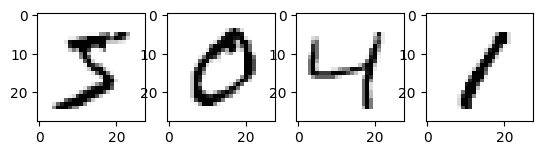

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 4, 1)
ax2 = fig.add_subplot(1, 4, 2)
ax3 = fig.add_subplot(1, 4, 3)
ax4 = fig.add_subplot(1, 4, 4)

ax1.imshow(train_i[0], cmap = 'Greys')
ax2.imshow(train_i[1], cmap = 'Greys')
ax3.imshow(train_i[2], cmap = 'Greys')
ax4.imshow(train_i[3], cmap = 'Greys')

## 전처리

In [ ]:
train_i, test_i = train_i / 255, test_i / 255

## 모델링

이진일 때는 sigmoid, 다분류일 때는 softmax

중간층(256)은 더 쌓아도 상관 없지만 과적합이 될 우려가 있음, 마지막 층은 무조건 범주의 수만큼 쌓을 것

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(256, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [ ]:
256*784

200704

In [ ]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
model.fit(train_i, train_l, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2235 - accuracy: 0.9344
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0927 - accuracy: 0.9722
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0603 - accuracy: 0.9818
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0423 - accuracy: 0.9872
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0324 - accuracy: 0.9897


In [ ]:
test_loss, test_acc = model.evaluate(test_i, test_l, verbose = 2)
print('test loss = %.3f, test accuracy = %.3f' %(test_loss, test_acc))

313/313 - 1s - loss: 0.0773 - accuracy: 0.9780 - 779ms/epoch - 2ms/step
test loss = 0.077, test accuracy = 0.978


### Upgrade

> 1. 은닉층을 더 깊게 만든다
2. 에폭을 증가시킨다
3. 학습용 데이터를 늘린다
4. 하이퍼파라미터를 튜닝한다

In [ ]:
train_i

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [ ]:
train_l

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
model_2 = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(256, activation = 'relu'),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

In [ ]:
model_2.compile(optimizer = 'adam',
                loss = 'sparse_categorical_crossentropy',
                metrics = ['accuracy'])

In [ ]:
model_2.fit(train_i, train_l, epochs = 10, verbose = 1)

test_loss, test_acc = model_2.evaluate(test_i, test_l, verbose = 0)
print('test loss = %.3f, test accuracy = %.3f' %(test_loss, test_acc))

Epoch 1/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2130 - accuracy: 0.9357
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0911 - accuracy: 0.9711
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0657 - accuracy: 0.9791
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0483 - accuracy: 0.9849
Epoch 5/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0402 - accuracy: 0.9868
Epoch 6/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0340 - accuracy: 0.9892
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0284 - accuracy: 0.9909
Epoch 8/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0259 - accuracy: 0.9916
Epoch 9/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0221 - accuracy: 0.9930
Epoch 10/10
1875/1875 [==============================] - 13s 7ms/step - l

### My image

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

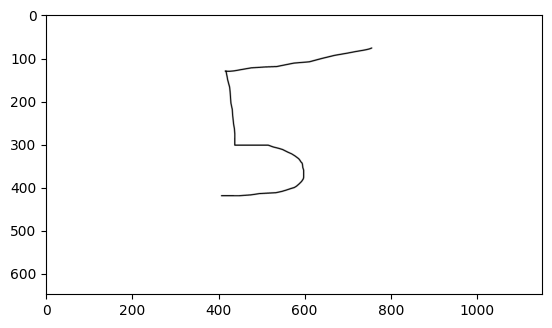

In [ ]:
img = mpimg.imread('/content/5.png')
plt.imshow(img)

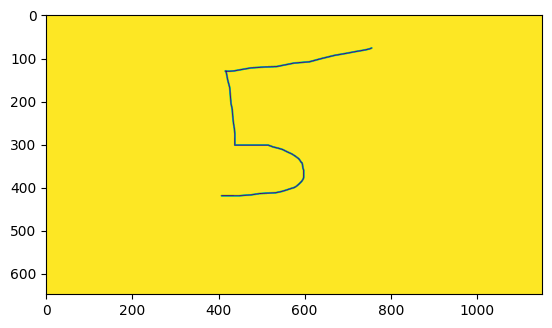

In [ ]:
img = cv2.imread('/content/5.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(img)

In [ ]:
img.shape

(648, 1152)

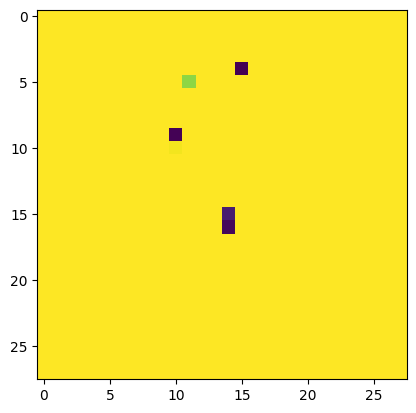

In [ ]:
img = cv2.resize(img, (28, 28))
plt.imshow(img)

In [ ]:
img.shape

(28, 28)

In [ ]:
img

array([[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255,   0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 212, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [25

In [ ]:
pred = model_2.predict(img[np.newaxis, :])
pred.argmax()

1/1 [==============================] - 0s 27ms/step


5

In [ ]:
img = (255 - img) / 255
pred = model_2.predict(img[np.newaxis, :, :])
pred.argmax()

1/1 [==============================] - 0s 22ms/step


8

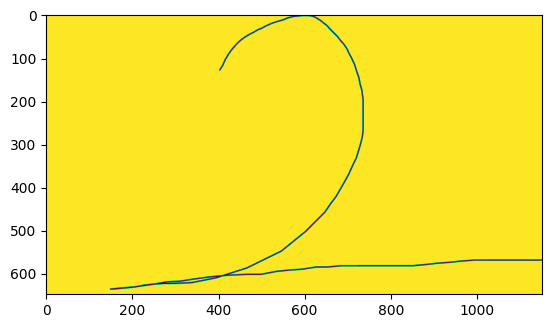

In [ ]:
img = cv2.imread('/content/2.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(img)

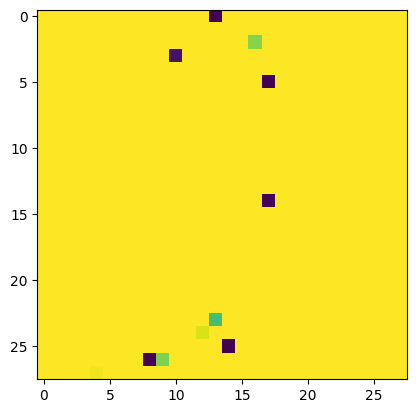

In [ ]:
img = cv2.resize(img, (28, 28))
plt.imshow(img)

In [ ]:
img = (255 - img) / 255
pred = model_2.predict(img[np.newaxis, :, :])
pred.argmax()

1/1 [==============================] - 0s 25ms/step


7

### Iris data 분류

In [ ]:
import numpy as np
from sklearn.datasets import load_iris

iris = load_iris()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_tr, x_te, y_tr, y_te = train_test_split(iris['data'], iris['target'], random_state = 0, test_size = 0.2)

In [ ]:
model = keras.models.Sequential([keras.layers.Flatten(input_shape = (4, )),
                                 keras.layers.Dense(60, activation = 'relu'),
                                 keras.layers.Dense(30, activation = 'relu'),
                                 keras.layers.Dense(3, activation = 'softmax')])

In [ ]:
x_tr[0].shape

(28, 28)

In [ ]:
y_tr.shape

(60000,)

In [ ]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
hist = model.fit(x_tr, y_tr, epochs = 30, batch_size = 5, verbose = 0)

In [ ]:
model.evaluate(x_te, y_te, verbose = 1)

1/1 [==============================] - 0s 153ms/step - loss: 0.0561 - accuracy: 1.0000


[0.056109365075826645, 1.0]

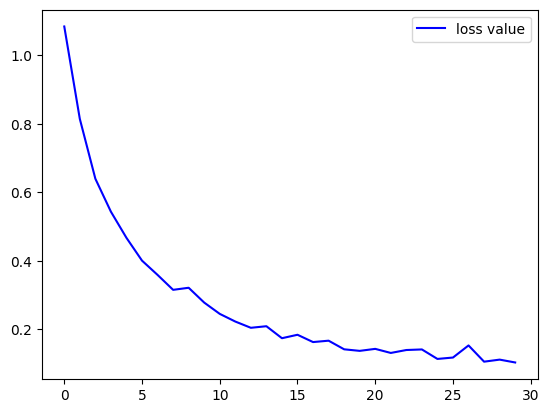

In [ ]:
plt.plot(hist.history['loss'], 'b-', label = 'loss value')
plt.legend()

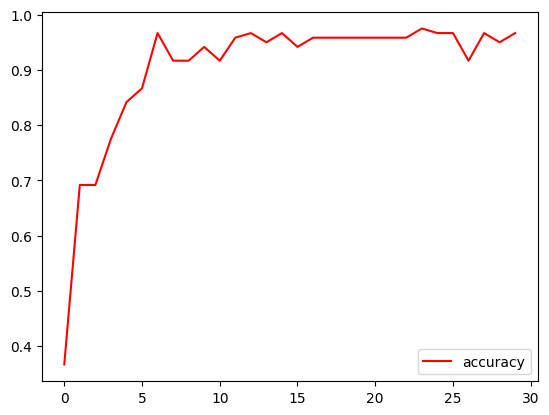

In [ ]:
plt.plot(hist.history['accuracy'], 'r-', label = 'accuracy')
plt.legend()

### 모델 저장

In [ ]:
model.save('/content/drive/MyDrive/iris_model.h5')

In [ ]:
from keras.models import load_model

In [ ]:
load = keras.models.load_model('/content/drive/MyDrive/iris_model.h5')

In [ ]:
load.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 4)                 0         
                                                                 
 dense_6 (Dense)             (None, 60)                300       
                                                                 
 dense_7 (Dense)             (None, 30)                1830      
                                                                 
 dense_8 (Dense)             (None, 3)                 93        
                                                                 
Total params: 2,223
Trainable params: 2,223
Non-trainable params: 0
_________________________________________________________________


# 수치값 예측

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

## Data

In [ ]:
x_tr = np.array([[0], [1], [2]])
y_tr = 3 * x_tr + 1

x_te = np.array([[3], [4], [5]])
y_te = 3 * x_te + 1

In [ ]:
x_tr[0].shape

(1,)

In [ ]:
x_tr.flatten()

array([0, 1, 2])

## 모델링

**선형회귀의 경우 출력단에 활성화 함수를 사용하지 않는다.**

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(4, input_shape = (1, )))
model.add(keras.layers.Dense(1))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 4)                 8         
                                                                 
 dense_10 (Dense)            (None, 1)                 5         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss = 'mean_squared_error',
              optimizer = 'sgd',
              metrics = ['accuracy'])
model.fit(x_tr, y_tr, epochs = 30, batch_size = 2)

Epoch 1/30
2/2 [==============================] - 0s 8ms/step - loss: 41.4241 - accuracy: 0.0000e+00
Epoch 2/30
2/2 [==============================] - 0s 8ms/step - loss: 24.9351 - accuracy: 0.3333
Epoch 3/30
2/2 [==============================] - 0s 12ms/step - loss: 16.4770 - accuracy: 0.3333
Epoch 4/30
2/2 [==============================] - 0s 7ms/step - loss: 10.7065 - accuracy: 0.3333
Epoch 5/30
2/2 [==============================] - 0s 11ms/step - loss: 4.9120 - accuracy: 0.3333
Epoch 6/30
2/2 [==============================] - 0s 7ms/step - loss: 1.9973 - accuracy: 0.3333
Epoch 7/30
2/2 [==============================] - 0s 7ms/step - loss: 1.1470 - accuracy: 0.3333
Epoch 8/30
2/2 [==============================] - 0s 8ms/step - loss: 0.7416 - accuracy: 0.3333
Epoch 9/30
2/2 [==============================] - 0s 8ms/step - loss: 0.5809 - accuracy: 0.3333
Epoch 10/30
2/2 [==============================] - 0s 8ms/step - loss: 0.3981 - accuracy: 0.3333
Epoch 11/30
2/2 [============

In [ ]:
pred = model.predict(x_te)
print(y_te.flatten())
print(pred.flatten())

1/1 [==============================] - 0s 62ms/step
[10 13 16]
[ 9.645874 12.408333 15.170791]


# 미니 배치

온라인 학습과 풀 배치 학습의 중간에 있는 과정

> 온라인 학습: 훈련 샘플 중 무작위로 하나를 골라서 학습을 수행하는 방식   
풀 배치 학습: 샘플 전체에 대해 가중치를 모두 구한 후 평균을 계산

In [ ]:
import numpy as np
import tensorflow as tf

In [ ]:
(x_tr, y_tr), (x_te, y_te) = tf.keras.datasets.mnist.load_data()

In [ ]:
data_size = x_tr.shape[0]
batch_size = 12
idx = np.random.choice(data_size, batch_size)
print(idx)
x_batch = x_tr[idx]
y_vatch = y_tr[idx]

[ 8053 48633 14829  7550 43319 31101 38679 23682 37441 29620 58886 11365]


# 예제

## Fashion item

In [ ]:
fa = keras.datasets.fashion_mnist
(train_i, train_l), (test_i, test_l) = fa.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
train_i = train_i / 255
test_i = test_i / 255

In [ ]:
model = keras.Sequential([keras.layers.Flatten(input_shape = (28, 28)),
                           keras.layers.Dense(128, activation = 'relu'),
                           keras.layers.Dense(10, activation = 'softmax')])

In [ ]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
model.fit(train_i, train_l, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5032 - accuracy: 0.8239
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3738 - accuracy: 0.8654
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3369 - accuracy: 0.8769
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3121 - accuracy: 0.8853
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2940 - accuracy: 0.8919


In [ ]:
test_loss, test_acc = model.evaluate(test_i, test_l, verbose = 1)
print('정확도: ', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3525 - accuracy: 0.8737
정확도:  0.8737000226974487


## Titanic

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras

In [2]:
train = pd.read_csv('/content/train.csv', sep = ',')
test = pd.read_csv('/content/test.csv', sep = ',')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train.drop(['SibSp', 'Parch', 'Ticket', 'Embarked', 'Name', 'Cabin', 'PassengerId', 'Fare', 'Age'], inplace = True, axis = 1)
test.drop(['SibSp', 'Parch', 'Ticket', 'Embarked', 'Name', 'Cabin', 'PassengerId', 'Fare', 'Age'], inplace = True, axis = 1)
train.dropna(inplace = True)
test.dropna(inplace = True)

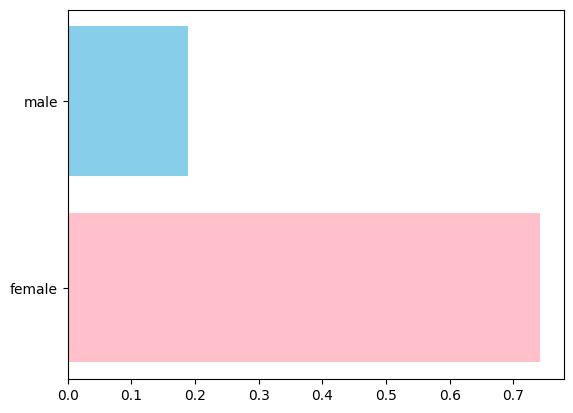

In [ ]:
df = train.groupby('Sex').mean()['Survived']
plt.barh(df.index, df.values, color = ['pink', 'skyblue'])
plt.show()

In [ ]:
train.head()

,Survived,Pclass,Sex
0,0,3,male
1,1,1,female
2,1,3,female
3,1,1,female
4,0,3,male


In [ ]:
test.head()

,Pclass,Sex
0,3,male
1,3,female
2,2,male
3,3,male
4,3,female


In [5]:
for i in train.index:
  if train.loc[i, 'Sex'] == 'male':
    train.loc[i, 'Sex'] = 1
  else:
    train.loc[i, 'Sex'] = 0

In [6]:
for i in test.index:
  if test.loc[i, 'Sex'] == 'male':
    test.loc[i, 'Sex'] = 1
  else:
    test.loc[i, 'Sex'] = 0

In [7]:
target = np.ravel(train.Survived)

In [9]:
train.drop(['Survived'], inplace = True, axis = 1)

train = train.astype(float)
test = test.astype(float)

In [14]:
train = np.array(train)

In [8]:
target

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [21]:
target.shape

(891,)

In [22]:
train.shape

(891, 2)

In [16]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(16, activation = 'relu', input_shape = (2, )))
model.add(keras.layers.Dense(8, activation = 'relu'))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [17]:
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [27]:
model.fit(train, target, epochs = 20, batch_size = 1, verbose = 1)

Epoch 1/20
891/891 [==============================] - 2s 2ms/step - loss: 0.4554 - accuracy: 0.7901
Epoch 2/20
891/891 [==============================] - 2s 2ms/step - loss: 0.4559 - accuracy: 0.7800
Epoch 3/20
891/891 [==============================] - 2s 2ms/step - loss: 0.4561 - accuracy: 0.7845
Epoch 4/20
891/891 [==============================] - 2s 2ms/step - loss: 0.4556 - accuracy: 0.7823
Epoch 5/20
891/891 [==============================] - 2s 3ms/step - loss: 0.4561 - accuracy: 0.7845
Epoch 6/20
891/891 [==============================] - 2s 2ms/step - loss: 0.4548 - accuracy: 0.7823
Epoch 7/20
891/891 [==============================] - 2s 2ms/step - loss: 0.4573 - accuracy: 0.7823
Epoch 8/20
891/891 [==============================] - 2s 2ms/step - loss: 0.4552 - accuracy: 0.7778
Epoch 9/20
891/891 [==============================] - 2s 2ms/step - loss: 0.4561 - accuracy: 0.7767
Epoch 10/20
891/891 [==============================] - 2s 2ms/step - loss: 0.4552 - accuracy: 0.7834

In [28]:
pred = model.predict(test)

14/14 [==============================] - 0s 2ms/step


In [42]:
pred

array([[0.1310735 ],
       [0.49265602],
       [0.22178413],
       [0.1310735 ],
       [0.49265602],
       [0.1310735 ],
       [0.49265602],
       [0.22178413],
       [0.49265602],
       [0.1310735 ],
       [0.1310735 ],
       [0.3560902 ],
       [0.97101545],
       [0.22178413],
       [0.97101545],
       [0.91682374],
       [0.22178413],
       [0.1310735 ],
       [0.49265602],
       [0.49265602],
       [0.3560902 ],
       [0.1310735 ],
       [0.97101545],
       [0.3560902 ],
       [0.97101545],
       [0.1310735 ],
       [0.97101545],
       [0.1310735 ],
       [0.3560902 ],
       [0.1310735 ],
       [0.22178413],
       [0.22178413],
       [0.49265602],
       [0.49265602],
       [0.3560902 ],
       [0.1310735 ],
       [0.49265602],
       [0.49265602],
       [0.1310735 ],
       [0.1310735 ],
       [0.1310735 ],
       [0.3560902 ],
       [0.1310735 ],
       [0.91682374],
       [0.97101545],
       [0.1310735 ],
       [0.3560902 ],
       [0.131

## Wine

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/wine.csv', header = None)

In [ ]:
x = df.iloc[:, 0:12]
y = df.iloc[:, 12]

In [ ]:
x_tr, x_te, y_tr, y_te = train_test_split(x, y, test_size = 0.2, shuffle = True)

In [ ]:
x_tr.shape

(5197, 12)

### 층 하나씩 쌓기

In [ ]:
model = Sequential()

model.add(Dense(30, input_shape = (12,), activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 30)                390       
                                                                 
 dense_22 (Dense)            (None, 12)                372       
                                                                 
 dense_23 (Dense)            (None, 8)                 104       
                                                                 
 dense_24 (Dense)            (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


### 컴파일(최적화, 손실함수, 기준)

In [ ]:
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(x_tr, y_tr, epochs = 50, batch_size = 500, validation_split = 0.25)

Epoch 1/50
8/8 [==============================] - 2s 36ms/step - loss: 0.4412 - accuracy: 0.8450 - val_loss: 0.3653 - val_accuracy: 0.7869
Epoch 2/50
8/8 [==============================] - 0s 10ms/step - loss: 0.3259 - accuracy: 0.8127 - val_loss: 0.3581 - val_accuracy: 0.7862
Epoch 3/50
8/8 [==============================] - 0s 10ms/step - loss: 0.3045 - accuracy: 0.8332 - val_loss: 0.3182 - val_accuracy: 0.8492
Epoch 4/50
8/8 [==============================] - 0s 10ms/step - loss: 0.2742 - accuracy: 0.8902 - val_loss: 0.2861 - val_accuracy: 0.9023
Epoch 5/50
8/8 [==============================] - 0s 9ms/step - loss: 0.2534 - accuracy: 0.9171 - val_loss: 0.2626 - val_accuracy: 0.9069
Epoch 6/50
8/8 [==============================] - 0s 7ms/step - loss: 0.2315 - accuracy: 0.9220 - val_loss: 0.2448 - val_accuracy: 0.9162
Epoch 7/50
8/8 [==============================] - 0s 11ms/step - loss: 0.2160 - accuracy: 0.9294 - val_loss: 0.2296 - val_accuracy: 0.9262
Epoch 8/50
8/8 [=============

### 테스트로 평가

In [ ]:
loss, acc = model.evaluate(x_te, y_te)
print('Test Accuracy: %.2f' %acc)

41/41 [==============================] - 0s 4ms/step - loss: 0.1252 - accuracy: 0.9523
Test Accuracy: 0.95


### Update

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
path = '/content/sample_data/{epoch:02d}-{val_accuracy:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath = path, verbose = 1)

In [ ]:
model = Sequential()

model.add(Dense(30, input_shape = (12,), activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 30)                390       
                                                                 
 dense_26 (Dense)            (None, 12)                372       
                                                                 
 dense_27 (Dense)            (None, 8)                 104       
                                                                 
 dense_28 (Dense)            (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(x_tr, y_tr, epochs = 50, batch_size = 500,
                    validation_split = 0.25, verbose = 0, callbacks = [checkpointer])


Epoch 1: saving model to /content/sample_data/01-0.9138.hdf5

Epoch 2: saving model to /content/sample_data/02-0.9231.hdf5

Epoch 3: saving model to /content/sample_data/03-0.9246.hdf5

Epoch 4: saving model to /content/sample_data/04-0.9231.hdf5

Epoch 5: saving model to /content/sample_data/05-0.9246.hdf5

Epoch 6: saving model to /content/sample_data/06-0.9231.hdf5

Epoch 7: saving model to /content/sample_data/07-0.9254.hdf5

Epoch 8: saving model to /content/sample_data/08-0.9246.hdf5

Epoch 9: saving model to /content/sample_data/09-0.9254.hdf5

Epoch 10: saving model to /content/sample_data/10-0.9246.hdf5

Epoch 11: saving model to /content/sample_data/11-0.9262.hdf5

Epoch 12: saving model to /content/sample_data/12-0.9262.hdf5

Epoch 13: saving model to /content/sample_data/13-0.9269.hdf5

Epoch 14: saving model to /content/sample_data/14-0.9269.hdf5

Epoch 15: saving model to /content/sample_data/15-0.9277.hdf5

Epoch 16: saving model to /content/sample_data/16-0.9292.hdf5



In [ ]:
score = model.evaluate(x_te, y_te)
print('Test accuracy: %.2f' %score[1])

41/41 [==============================] - 0s 3ms/step - loss: 0.1337 - accuracy: 0.9454
Test accuracy: 0.95


### 학습 자동 중단

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_callback = EarlyStopping(monitor = 'val_loss', patience = 20)

In [ ]:
path = '/content/model/best.hdf5'

checkpointer = ModelCheckpoint(filepath = path, monitor = 'val_loss', verbose = 0, save_best_only = True)

In [ ]:
model = Sequential()

model.add(Dense(30, input_shape = (12,), activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 30)                390       
                                                                 
 dense_30 (Dense)            (None, 12)                372       
                                                                 
 dense_31 (Dense)            (None, 8)                 104       
                                                                 
 dense_32 (Dense)            (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(x_tr, y_tr, epochs = 2000, batch_size = 500,
                    validation_split = 0.25, verbose = 1, callbacks = [early_callback, checkpointer])

Epoch 1/2000
8/8 [==============================] - 3s 68ms/step - loss: 2.9232 - accuracy: 0.7632 - val_loss: 2.5613 - val_accuracy: 0.7308
Epoch 2/2000
8/8 [==============================] - 0s 26ms/step - loss: 1.7199 - accuracy: 0.7632 - val_loss: 1.3814 - val_accuracy: 0.7315
Epoch 3/2000
8/8 [==============================] - 0s 27ms/step - loss: 0.8649 - accuracy: 0.7824 - val_loss: 0.6318 - val_accuracy: 0.8162
Epoch 4/2000
8/8 [==============================] - 0s 18ms/step - loss: 0.3969 - accuracy: 0.8786 - val_loss: 0.3062 - val_accuracy: 0.8992
Epoch 5/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.3177 - accuracy: 0.8979 - val_loss: 0.2915 - val_accuracy: 0.8992
Epoch 6/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.2700 - accuracy: 0.9102 - val_loss: 0.2635 - val_accuracy: 0.9069
Epoch 7/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.2431 - accuracy: 0.9128 - val_loss: 0.2608 - val_accuracy: 0.9054
Epoch 8/2000


In [ ]:
score = model.evaluate(x_te, y_te)
print('Test accuracy: ', score[1])

41/41 [==============================] - 0s 8ms/step - loss: 0.0666 - accuracy: 0.9800
Test accuracy:  0.9800000190734863
